#### Actividad en Clase 1

##### Parte 1

Utilizando OpenCV:

1. Carga la imagen "gato.webp" a color.
2. Separa los canales R, G, B.
3. Muestra en un histograma los valores de cada canal por separado.
4. Transforma la imagen a:
- Escala de grises
- HSV
- YCbCr
5. Muestra el histograma en los canales de luminancia (grises, V, Y) respectivamente

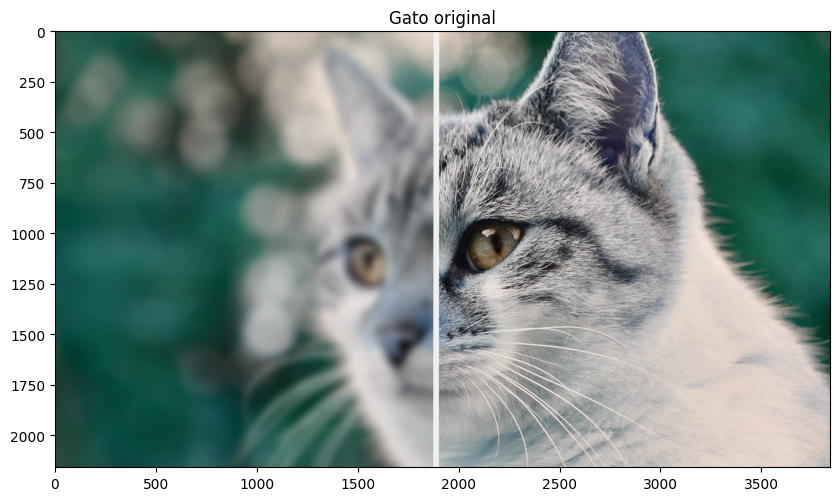

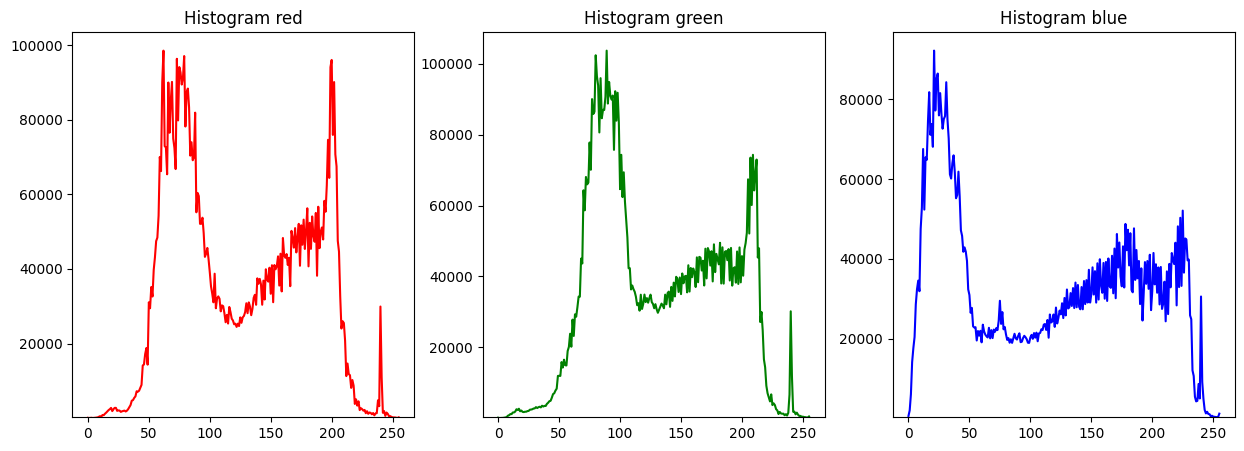

In [ ]:
# TODO: PARTE 1
import cv2
import matplotlib.pyplot as plt
import numpy as np
## Parte 1 ##
img = cv2.imread("gato.webp")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title("Gato original")
## Parte 2 ##
r, g, b = img_rgb.transpose(2, 0, 1)
hist_r = np.histogram(r, bins=256, range=(0, 255))[0]
hist_g = np.histogram(g, bins=256, range=(0, 255))[0]
hist_b = np.histogram(b, bins=256, range=(0, 255))[0]
## Parte 3 ##
histo={"red":hist_r,"green":hist_g,"blue":hist_b}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name , h) in enumerate(histo.items()):
    axes[i].plot(h,color=name)
    axes[i].set_title(f"Histogram {name}")
    axes[i].set_ylim(255)

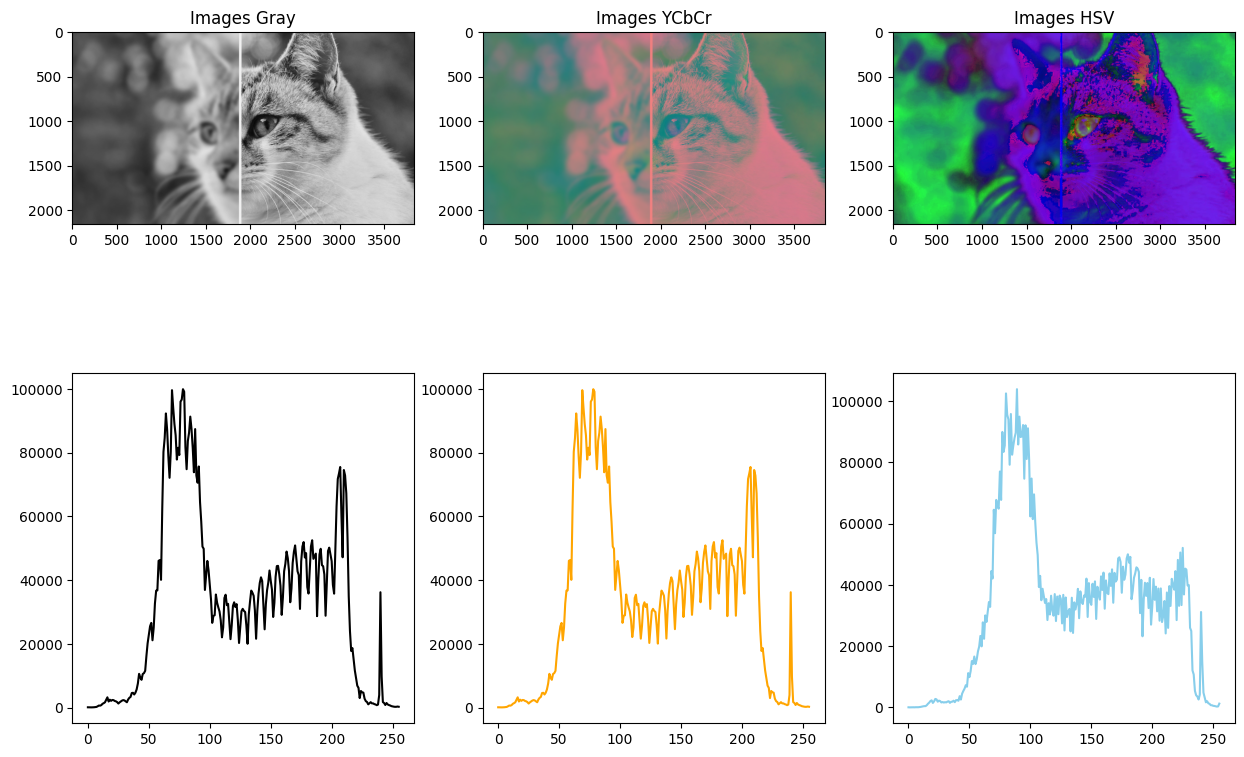

In [36]:
transf = {
    "Gray": cv2.COLOR_BGR2GRAY,
    "YCbCr": cv2.COLOR_BGR2YCrCb,
    "HSV": cv2.COLOR_BGR2HSV,
}
_, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (name, value) in enumerate(transf.items()):
    img_v = cv2.cvtColor(img, value)
    if img_v.ndim == 2:
        axes[0][i].imshow(img_v, cmap="gray")
    else:
        axes[0][i].imshow(img_v)
    axes[0][i].set_title(f"Images {name}")
    match name:
        case "Gray":
            histogram = np.histogram(img_v, 256, (0, 255))[0]
            axes[1][i].plot(histogram,color="black")
        case "YCbCr":
            y,_,_=img_v.transpose(2,0,1)
            histogram = np.histogram(y, 256, (0, 255))[0]
            axes[1][i].plot(histogram,color="orange")
        case "HSV":
            _,_,y=img_v.transpose(2,0,1)
            histogram = np.histogram(y, 256, (0, 255))[0]
            axes[1][i].plot(histogram,color="skyblue")

##### Parte 2

Usando OpenCV: 

1. Aplica los siguientes filtros sobre la imagen "gato.webp" en escala de grises:

- Suavizado (blur): Promedio y Gaussiano
- Sharpen
- Detección de bordes (Sobel X, Y)
- High-Pass

2. Crea una grilla comparativa 2×3 (original + 5 filtradas)

3. Responde a la pregunta: ¿Que filtro te parece que conserva mejor los detalles? ¿Cuál reduce el ruido?

In [ ]:
# TODO: Parte 2

##### Parte 3

1. Utilizando OpenCV y el código de la clase de hoy:

Con la imagen p_fut.jpg, intenta separar a la pelota del fondo. A este proceso se le llama segmentación. (No tiene que ser perfecta, pero si lo mejor que puedas). Esta parte requiere ser muy creativo.


In [50]:
import torch
import torch.nn.functional as F

filtros_tensores = {
    "blur": torch.tensor([[1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9],
                          [1/9, 1/9, 1/9]], dtype=torch.float32),

    "gaussian": torch.tensor([[1, 2, 1],
                               [2, 4, 2],
                               [1, 2, 1]], dtype=torch.float32) / 16,

    "sobel_x": torch.tensor([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]], dtype=torch.float32),

    "sobel_y": torch.tensor([[-1, -2, -1],
                              [0,   0,  0],
                              [1,   2,  1]], dtype=torch.float32),

    "scharr_x": torch.tensor([[-3, 0, 3],
                               [-10, 0, 10],
                               [-3, 0, 3]], dtype=torch.float32),

    "laplacian": torch.tensor([[0, 1, 0],
                                [1, -4, 1],
                                [0, 1, 0]], dtype=torch.float32),

    "prewitt_x": torch.tensor([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]], dtype=torch.float32),

    "unsharp_mask": torch.tensor([[0, -1, 0],
                                   [-1, 5, -1],
                                   [0, -1, 0]], dtype=torch.float32),

    "sharpen_strong": torch.tensor([[0, -1, 0],
                                     [-1, 9, -1],
                                     [0, -1, 0]], dtype=torch.float32),

    "emboss": torch.tensor([[-2, -1, 0],
                             [-1,  1, 1],
                             [ 0,  1, 2]], dtype=torch.float32),

    "edge_enhance": torch.tensor([[-1, -1, -1],
                                   [-1,  8, -1],
                                   [-1, -1, -1]], dtype=torch.float32),

    "erosion": torch.ones((3, 3), dtype=torch.float32),
    "dilation": torch.ones((3, 3), dtype=torch.float32),
    "opening": torch.ones((3, 3), dtype=torch.float32),
    "closing": torch.ones((3, 3), dtype=torch.float32),
}

def aplicar_filtro(img_tensor, kernel):
    k = kernel.view(1, 1, 3, 3) # [1, 1, H, W]
    return F.conv2d(img_tensor, k, padding=1)

In [53]:
# TODO: Parte 3

import cv2 
import numpy as np
import matplotlib.pyplot as plt 

img_p=cv2.imread("p_fut.jpg")
img_p_rgb=cv2.cvtColor(img_p,cv2.COLOR_BGR2RGB)
img_p_gray=cv2.cvtColor(img_p,cv2.COLOR_BGR2GRAY)
img_eq=cv2.equalizeHist(img_p_gray)

15


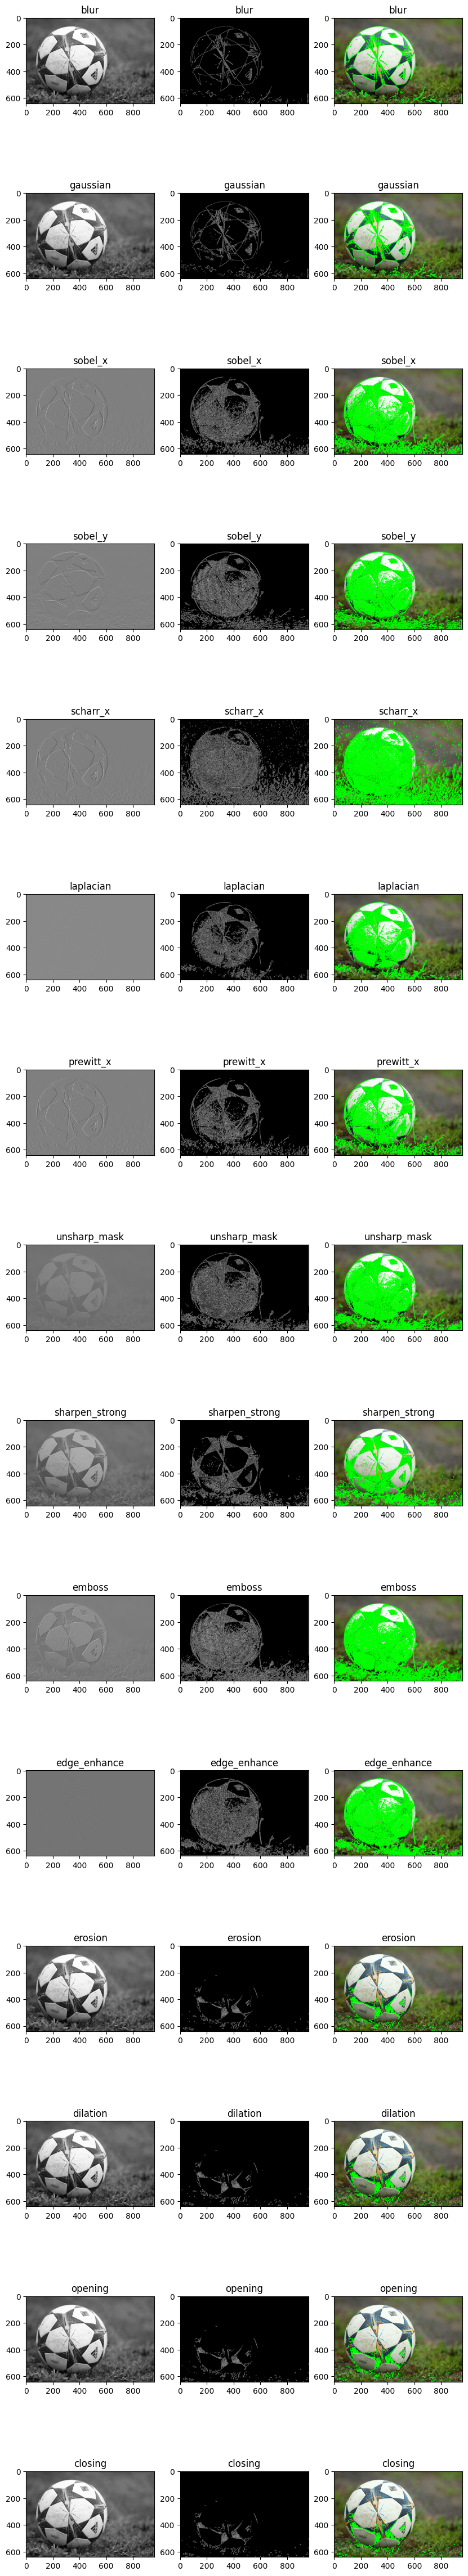

In [64]:
print(len(filtros_tensores))
_, axes = plt.subplots(len(filtros_tensores), 3, figsize=(10, 60))
low_threshold, high_threshold=200,300
# Convert img_p_gray to torch tensor and add batch/channel dims
img_tensor = torch.from_numpy(img_p_gray).float().unsqueeze(0).unsqueeze(0)
for i, (name, fil) in enumerate(filtros_tensores.items()):
    img_f = aplicar_filtro(img_tensor, fil)
    img_f_np = img_f.squeeze().detach().numpy()
    axes[i, 0].imshow(img_f_np, cmap="gray")
    axes[i, 0].set_title(name)
    # Convert to uint8 for Canny
    img_f_uint8 = np.clip(img_f_np, 0, 255).astype(np.uint8)
    thresh = cv2.Canny(img_f_uint8, low_threshold, high_threshold)
    axes[i, 1].imshow(thresh, cmap="gray")
    axes[i, 1].set_title(name)
    # buscar contornos 
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
    # Dibujar contorno 
    img_contours = img_p_rgb.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # color verde, grosor 2
    axes[i, 2].imshow(img_contours, cmap="gray")
    axes[i, 2].set_title(name)